## Load LIBs

In [206]:
import zipfile
from pathlib import Path

import librosa
import matplotlib.pyplot as plt
import numpy as np
import soundfile

from mllib.utils.dvc import load_params

## Processing sound files


We can get names of files in zip.


In [207]:
%load_ext autoreload
%autoreload 2

params = load_params()

train_zip = Path(params['data']['train_zip'])
# get path of file
def get_names(zip_path):
    with zipfile.ZipFile(zip_path) as zip_file:
        names = zip_file.namelist()
    return names
names = get_names(train_zip)
file = names[4]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
# plot simple data and librosa waveshoe
%load_ext autoreload
%autoreload 2
from src.utils.files import read_y_sr_from_zip

file_path = name[1]
fig, ax = plt.subplots(nrows=1, ncols=2)

y, sr = read_y_sr_from_zip(zip_path=train_zip, file_name=file_path)
# plot read signal
ax[0].plot(y)

# plot librosa wave
librosa.display.waveshow(y, sr=sr, ax=ax[1], color="r")
fig.set_size_inches(10, 2)
sr

ImportError: cannot import name 'read_y_sr_from_zip' from 'src.utils.files' (d:\GD Anton\dev\data\02_problems\2022-07_Yandes_ML_Test\06_bio\src\utils\files.py)

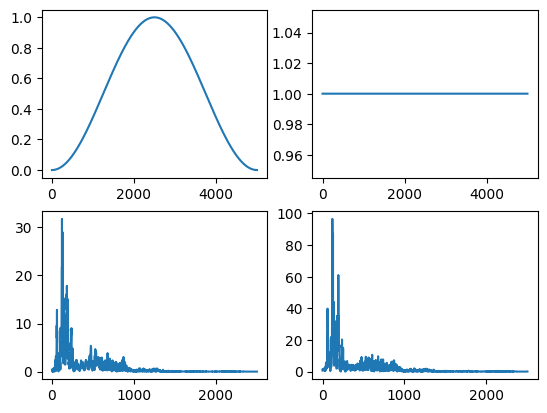

In [5]:
# Сравнение спектров, полученных с помощью дискретного преобразования Фурья
# для различных оконных функций.
import numpy as np


dft_input = y[30000:35000]
dd
# Рассчитаем ДПФ
window_han = np.hanning(len(dft_input))
window_one = np.ones(len(dft_input))
fig, ax = plt.subplots(2, 2)

ax[0][0].plot(window_han)
ax[0][1].plot(window_one)

windowed_input_han = dft_input * window_han
windowed_input_one = dft_input * window_one

dft_han = np.fft.rfft(windowed_input_han)
dft_one = np.fft.rfft(windowed_input_one)

# получим амплитудный спектр в децибелах
amplitude_han = np.abs(dft_han)
amplitude_one = np.abs(dft_one)

ax[1][0].plot(amplitude_han)
ax[1][1].plot(amplitude_one)

## Process zip file with sound file

In [247]:
# process byte file from zip

%load_ext autoreload
%autoreload 2

from src.utils.data_process import get_im, save_im
from PIL import Image
import numpy as np

params = load_params()
zip_path = Path(params["data"]["train_zip"])

file_path = names[8]
with zipfile.ZipFile(zip_path) as zip_file:
    with zip_file.open(file_path) as byte_file:
        save_im(byte_file, 'data/test.png')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [235]:
mel_db.shape
im = Image.open("data/test3.png")
im.size, im.format, im.info, im.mode

((64, 128), 'PNG', {}, 'L')

In [166]:
import numpy as np

ar = np.array(im)
ar.shape

(128, 201)

In [142]:
RGBA_list = []
for i in range(0, 3):
    RGBA_list.append(ar[:, :, i])

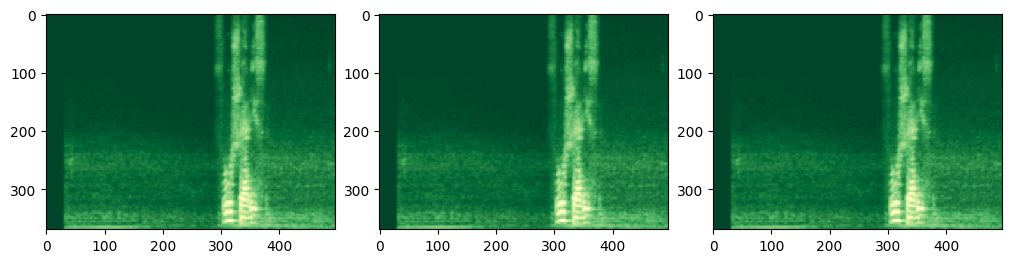

In [145]:
fig, axes = plt.subplots(1, 3, layout="constrained", figsize=(10, 20))

for i in range(0, 3):
    axes[i].imshow(RGBA_list[i], cmap="YlGn")

In [148]:
all((RGBA_list[0] == RGBA_list[1]).flatten()), all(
    (RGBA_list[0] == RGBA_list[2]).flatten()
)

(True, True)

In [39]:
mel_db

array([[-80.        , -80.        , -80.        , ..., -45.69843045,
        -45.89362257, -48.32123693],
       [-80.        , -80.        , -80.        , ..., -42.8270591 ,
        -44.14990639, -45.27501418],
       [-80.        , -80.        , -80.        , ..., -48.2849986 ,
        -48.00346967, -50.9748481 ],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

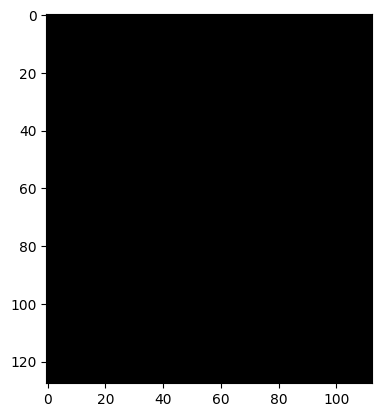

In [ ]:
im = im.convert("RGB")

In [ ]:
im.save("data/test2.png")

In [8]:
# save processed file

%load_ext autoreload
%autoreload 2

from src.utils.data_process import get_im, save_im
from mllib.utils.dvc import load_params
from pathlib import Path
import zipfile

params = load_params()
zip_path = Path(params["data"]["train_zip"])

file_path = "train/c539d24c9e9217f096fafa7e965a2130.wav"
output_file = Path('data/test.png')

with zipfile.ZipFile(zip_path) as zip_file:
    with zip_file.open(file_path) as byte_file:
        save_im(byte_file=byte_file, output_path=output_file)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from src.utils.files import zip_folder

zip_path = processed_path / "ptrain.zip"
zip_folder(zip_path=zip_path, input_path=tmp_path)

get_files_list(zip_path=zip_path)

data\processed\train_processed [] ['c539d24c9e9217f096fafa7e965a2130.png', '5d3e96c9f3426d2644c415bbbe8bac5e.png']


['train_processed/c539d24c9e9217f096fafa7e965a2130.png',
 'train_processed/5d3e96c9f3426d2644c415bbbe8bac5e.png']